In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ECA_Data.csv') #read data

In [3]:
#check df
df

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [4]:
#Question 2
df.duplicated().sum()

3

In [5]:
#delete duplicate row
df = df.drop_duplicates().reset_index()
del df['index']

In [6]:
#check df
df

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18761,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18762,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18763,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18764,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [7]:
#check the sum of missing value
df.isnull().sum()

ID            0
LIMIT         0
BALANCE       0
INCOME        0
RATING        0
GENDER        0
EDUCATION    13
MARITAL      38
AGE           0
S1            0
S2            0
S3            0
S4            0
S5            0
B1            0
B2            0
B3            0
B4            0
B5            0
R1            0
R2            0
R3            0
R4            0
R5            0
dtype: int64

In [8]:
#replace missing value to 0
df[["EDUCATION","MARITAL"]] = df[["EDUCATION","MARITAL"]].fillna(0)

In [9]:
#check data type
df.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3            object
R4             int64
R5             int64
dtype: object

In [10]:
#change of data type
df['R3'] = df['R3'].str.replace(r'\D', '')
df = df.astype({'R3':int})

C:\Users\Admin\AppData\Local\Temp\ipykernel_88576\2602398492.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['R3'] = df['R3'].str.replace(r'\D', '')


In [11]:
#check data type
df.dtypes

ID             int64
LIMIT          int64
BALANCE      float64
INCOME         int64
RATING         int64
GENDER         int64
EDUCATION    float64
MARITAL      float64
AGE            int64
S1             int64
S2             int64
S3             int64
S4             int64
S5             int64
B1             int64
B2             int64
B3             int64
B4             int64
B5             int64
R1             int64
R2             int64
R3             int32
R4             int64
R5             int64
dtype: object

In [12]:
#drop invalid age
df = df.drop(df[df.AGE.isin([-1, 199])].index)

In [13]:
#check number rows lesser
df

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18761,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18762,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18763,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18764,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


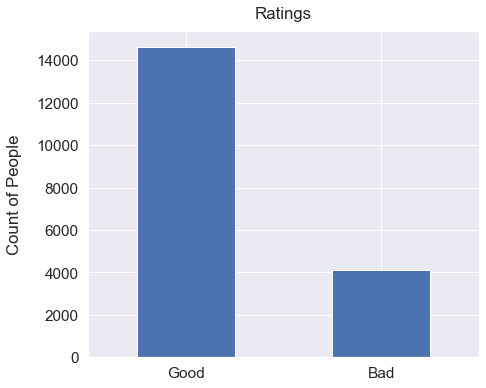

In [14]:
#Question 3
#Bar chart
sns.set(font_scale=1.4)
df['RATING'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xticks ([0, 1], ['Good', 'Bad'])
plt.ylabel("Count of People", labelpad=14)
plt.title("Ratings", y=1.02);

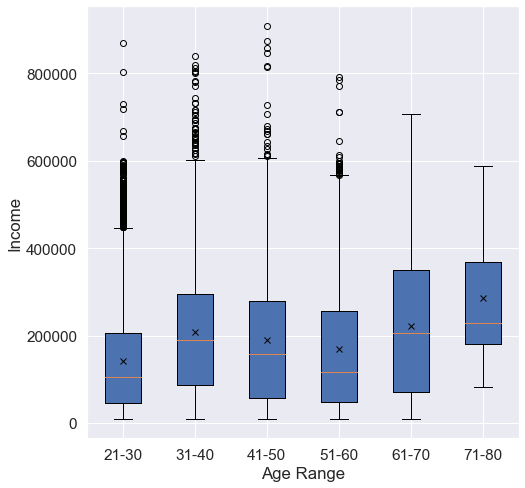

In [15]:
#Question 3
#Boxplot
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['agerange'] = pd.cut(df.AGE, bins, labels = labels,include_lowest = True)

d1 = df[df['agerange'].str.contains('21-30')]
d1 = d1.filter(['INCOME'])

d2 = df[df['agerange'].str.contains('31-40')]
d2 = d2.filter(['INCOME'])

d3 = df[df['agerange'].str.contains('41-50')]
d3 = d3.filter(['INCOME'])

d4 = df[df['agerange'].str.contains('51-60')]
d4 = d4.filter(['INCOME'])

d5 = df[df['agerange'].str.contains('61-70')]
d5 = d5.filter(['INCOME'])

d6 = df[df['agerange'].str.contains('71-80')]
d6 = d6.filter(['INCOME'])

data = np.array([d1, d2, d3, d4, d5, d6], dtype=object)
   
fig = plt.figure(figsize =(6, 6))
 
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(data)

box = plt.boxplot(data, #array to be plotted
                  patch_artist=True, #fill with color
                  flierprops={'markeredgecolor': 'None'}, #no marker edger for outliers
                  showmeans=True, #show the mean
                  meanprops={"marker":"x","markerfacecolor":"black", "markeredgecolor":"black"}) 

plt.xlabel('Age Range')
plt.ylabel('Income')
plt.xticks([1, 2, 3, 4, 5, 6], ['21-30', '31-40', '41-50', '51-60', '61-70','71-80'])

plt.show()

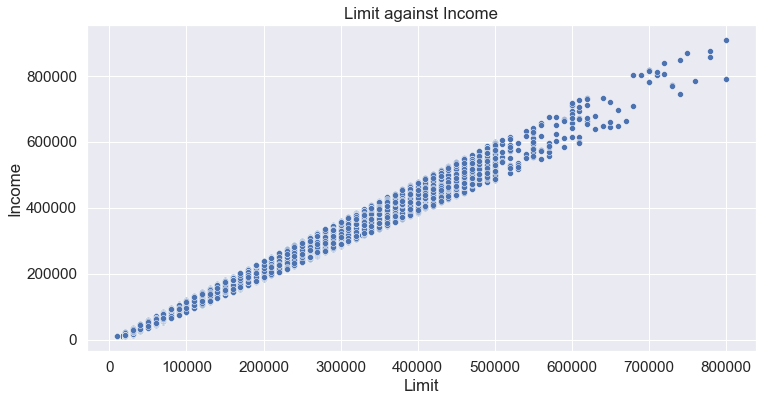

In [16]:
#Question 3
#Scatter plot
plt.figure(figsize=(12,6))
plt.title('Limit against Income')

sns.scatterplot(x='LIMIT',
               y= 'INCOME',
               data=df)

plt.xlabel('Limit')
plt.ylabel('Income')

plt.show()

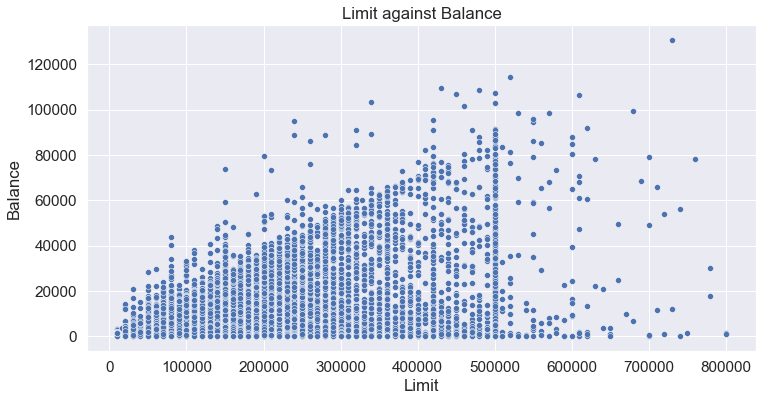

In [17]:
#Question 3
#Scatter plot
plt.figure(figsize=(12,6))
plt.title('Limit against Balance')

sns.scatterplot(x='LIMIT',
               y= 'BALANCE',
               data=df)

plt.xlabel('Limit')
plt.ylabel('Balance')

plt.show()

Text(0, 0.5, 'Education')

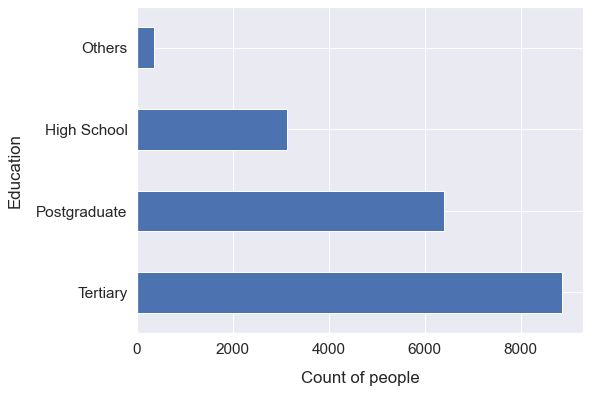

In [18]:
#Question 3
#Bar graph
df['EDUCATION'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.yticks([0, 1, 2, 3], ['Tertiary','Postgraduate','High School', 'Others'])
plt.xlabel("Count of people", labelpad=14)
plt.ylabel("Education", labelpad=14)

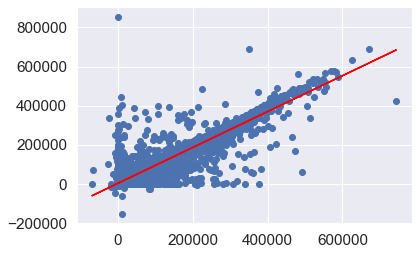

In [19]:
#Question 4
x = df.loc[:,'B1'].values.reshape(-1,1)
y = df.loc[:,'B2'].values.reshape(-1,1)
linear_regressor = LinearRegression()
linear_regressor.fit(x, y) 
y_pred = linear_regressor.predict(x)


plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()